# UTS Pembelajaran Teori dan Praktikum Mesin
Nama : Dikri Hidayat,
NIM  : 1197050030,
Kelas Praktikum dan Teori Pembelajaran Mesin D


# Topik Mini Riset
Mini Riset ini mengenai prediksi apakah seseorang akan membeli suatu produk setelah melihat iklan di social media dilihat dari umur dan pendapatan yang dimiliki, dengan menggunakan Algoritma Random Forest

#Business Understanding

### Latar Belakang  Masalah :-
Iklan sekarang tidak hanya kita temukan di pertelevisian namun juga telah banyak ada di media social seperti platform youtube, facebook, instagram dan lain sebagainya. Melihat iklan sudah menjadi hal yang umum bagi semua orang terutama yang memiliki smartphone, namun dengan reaksi yang berbeda beda terhadap iklan tersebut ada yang merasa terganggu atau tertarik dengan produk yang ditawarkan sehingga bergegas untuk membelinya.

### Identifikasi masalah :- 
Berdasarkan latar belakang penelitian, dapat ditarik identifikasi masalah yang ada ;
*   User dengan pendapatan berapa yang sering membeli produk yang dilihat diiklan ?
*   User dengan umur berapa yang sering membeli produk yang dilihat diiklan ?


### Metode/Pendekatan Masalah :- 
Metode yang dilakukan adalah melakukan data mining pada dataset yang ada lalu menggunakan Algoritma Random Forest untuk memprediksi sebuah hasil yang diinginkan.

### Tujuan teknis dan kriteria kesuksesan :-  
Diharapkan dari hasil mini riset akan mampu melihat hasil berupa rata rata umur dan pendapatan yang sering membeli produk yang dilihat diiklan

### Timeline Mini Riset :- 
18-22 April 2022





# Data Understanding
###Kebutuhan Data
Data yang diperlukan adalah dataset yang berisikan reaksi seseorang terhadap sebuah iklan dengan atribut umur dan pendapatan.
###Pengambilan Data
Untuk datasetnya saya ambil dari situs data mining yaitu Kaggle dengan judul Social Networks Adds adapun untuk alamat linknya : https://www.kaggle.com/code/ranjan770/random-forest-model-on-social-media-ad/data. 
###Integrasi Data
Data yang ada berisikan rekasi dari kumpulan user yang berbeda beda, juga dengan umur dan pendapatan yang berbeda
###Telaah Data
Dataset ini memiliki 3 buah dimensi dengan berisikan 400 data atau catatan. Data atau catatan yang ada berupa reaksi dari kumpulan user yang memiliki atribute berbeda-beda.  Berikut ini adalah pembahasan mengenai 3 dimensi yang ada pada datasetnya :-
1. Age : umur user yang melihat iklan
2. Estimated Salery : Pendapatan user yang melihat iklan
3. Purchased : Apakah user membeli produk yang diiklankan (1 = iya, 0 = tidak)

Pada data age kisaran umurnya yaitu 18 sampai 60 tahun, lalu untuk estimated salary ada di kisaran 15.000 - 150.000 dolar pertahun, dan untuk purchased berisikan angka 1 dan 0, 1 mewakilkan membeli setelah melihat ikaln produk, dan 0 mengabaikan iklan
###Analisis Karakteristik Data
Data yang digunakan berisikan numerik atau angka sebanyak 400 data.
###Validasi Data
Menurut publiser datasetnya sendiri dia berkata "This is a basic dataset for the beginner and can be used for implementing ML algorithms."

#Data Prepation

In [23]:
#Pertama tama disini membaca library terlebih dahulu

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [24]:
# Lalu selanjutnya meload data dan menginputkannya ke variabel baru

#importing the data
url = 'https://raw.githubusercontent.com/JohnMC453/UTS-1197050030-Dikri-Hidayat/main/Social_Network_Ads.csv'
df = pd.read_csv(url, sep=',')

# Membaca 5 data paling atas
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [25]:
# Melihat info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [26]:
# Meliihat besar data
df.shape

(400, 3)

In [27]:
# Mengecek apakah salah satu datanya ada yang null atau kosong
# Jika false maka data dapat di proses
df.isnull().values.any()

False

In [28]:
# Mendefinisikan dependent dan idenpendent variabel
x=df.drop(['Purchased'],axis=1)
y=df.pop("Purchased")

# Modeling

In [29]:
# Disini kita membaca library sklearn.model_selection.train_test_split untuk Pisahkan array atau matriks menjadi rangkaian acak dan subset pengujian. 
from sklearn.model_selection import train_test_split
X_train, X_test, train_labels, test_labels = train_test_split(x, y, test_size=.30, random_state=1)

# Disini kita akan membuat model Algoritma Random Forestnya
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 301,oob_score=True)   #disini kita menset banyak Tree pada Forestnta sebanyak 300, dan oob score bernilai true maka akan menggunakan sampel out-of-bag untuk memperkirakan skor generalisasi
rfcl = rfcl.fit(X_train, train_labels)   #dan disini kita membuild random forest tree dengan variabel x train dan train label
# lalu membuatkannya variabel baru agar lebih mudah
ytrain_predict = rfcl.predict(X_train)
ytest_predict = rfcl.predict(X_test)

# Evaluasi
jadi untuk proses selanjutnya adalah melakukan proses lanjutan terhadap ytrain dan ytestnya dengan Confusion Matrix dan ROV Curve test data.

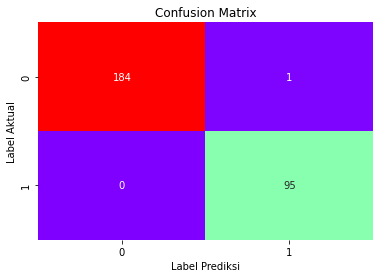

In [30]:
# Pertama disini kita proses ytrain_predict yang merupakan variabel untuk melatih/menyesuaikan data agar nanti pada ytest_predik bisa mengeluarkan output yang sesuai
# yang bila kita lihat dari test sizenya di ytrain ini dia menggunakan 70% dari total data acak

# disini kita menggunakan confusion matrix dengan tujuan mengevaluasi kinerja model klasifikasi melalui perhitungan metrik kinerja seperti akurasi, presisi, ingatan, dan skor F1. 
# dari hasil yang diberikan kotak berwarna ungu menandakan data yang eror dimana predict value nya dia 0 atau negatif namun ternyata positif ataupun kebalikannya
# untuk kotak berwarna hijau dan merah menandakan value predictnya yang tidak eror jika negatif maka negatif atau jika positif maka positif
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(train_labels,ytrain_predict)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Label Prediksi')
plt.ylabel('Label Aktual')
plt.title('Confusion Matrix')
plt.show()

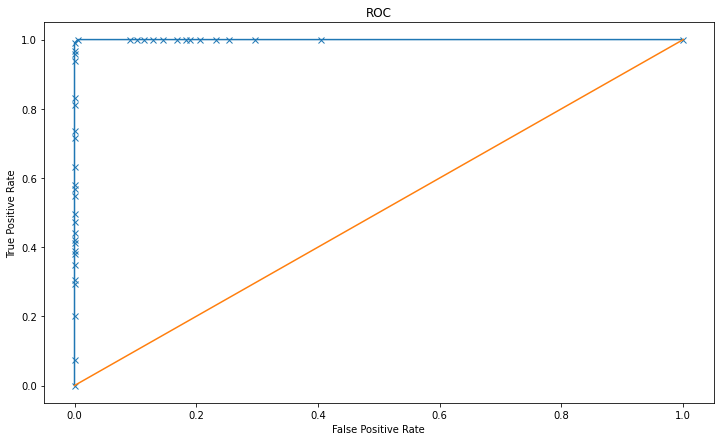

Area Dibawah Curva 0.9999715504978662


In [31]:
# jadi ROC kurva ini jika dalam pengujian medis, tingkat positif sebenarnya adalah tingkat di mana orang diidentifikasi dengan benar untuk dites positif untuk penyakit yang bersangkutan.
# Maka Jika didalam kasus ini tingkat positif berarti dimana orang dengan atribut yang ada akan benar benar membeli produk yang diiklankan

from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(train_labels,rfcl.predict_proba(X_train)[:,1]) # jadi ini adalah cara memfloting kurva ROC dipython
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area Dibawah Curva', roc_auc_score(train_labels,rfcl.predict_proba(X_train)[:,1]))

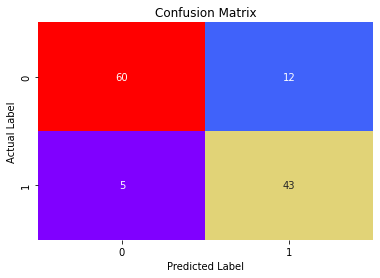

In [32]:
#Selanjutnya adalah kita proses y_test predict sebagai hasil akhir dari data training pada y_train dengan metode yang sama yaitu confusion matrix dan kurva ROC
confusion_matrix(test_labels,ytest_predict)
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [33]:
# Melihat laporan yang telah diproses di confusion matrx
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.92      0.83      0.88        72
           1       0.78      0.90      0.83        48

    accuracy                           0.86       120
   macro avg       0.85      0.86      0.86       120
weighted avg       0.87      0.86      0.86       120



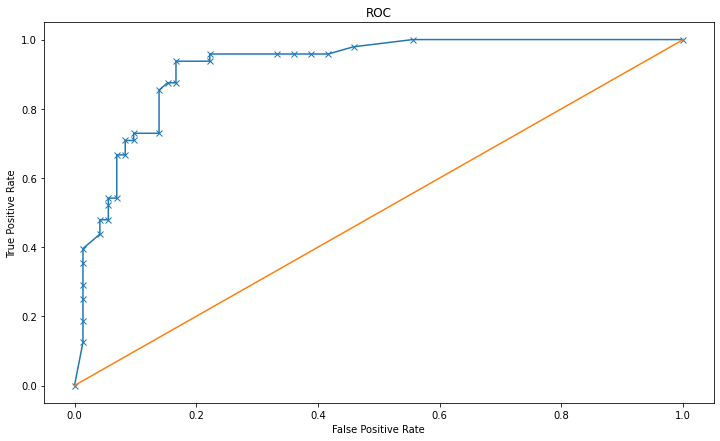

Area dibawah curva :  0.9197048611111113


In [34]:
# Dan terakhir kurva ROC 
rf_fpr, rf_tpr,_=roc_curve(test_labels,rfcl.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area dibawah curva : ', roc_auc_score(test_labels,rfcl.predict_proba(X_test)[:,1]))

Hasil Akhir : Disini selisih nilai AUC data train dan test hanya 8% sehingga model bekerja dengan baik dan data bersifat tidak seimbang, namun dapat memprediksi 0 dan 1